In [3]:
# importing libraries
import numpy as np 
import pandas as pd 
import os

In [2]:
# lets start by reading the csv file and then we will take a peek into it data

data=pd.read_csv('testset.csv',index_col=False)

data.sample(5)

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
4070,19970525-01:00,Haze,17.0,0,0,29.4,48.0,NaN,1004.0,0,0,29.0,0,0,4.0,80.0,East,NaN,NaN,5.6
59849,20040601-07:00,Haze,17.0,0,0,43.6,23.0,NaN,1004.0,0,0,42.0,0,0,3.5,240.0,WSW,NaN,NaN,9.3
83231,20120602-12:00,Widespread Dust,18.0,0,0,NaN,23.0,NaN,993.0,0,0,38.0,0,0,2.0,320.0,NW,NaN,NaN,16.7
32678,20020221-14:30,Smoke,12.0,0,0,NaN,50.0,NaN,1016.0,0,0,23.0,0,0,3.5,120.0,ESE,NaN,NaN,5.6
9708,19980726-19:30,Haze,28.0,0,0,43.9,79.0,NaN,999.0,0,0,32.0,0,0,2.2,150.0,SSE,NaN,NaN,3.7


In [4]:
# let's take a look at the overall data

data.describe()

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [5]:
# most of the data is numeric but we have lot's of missing values , let's take a better look at

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [6]:
# as we can see some of the columns have lot's of missing values i.e precipm( probably precipitation)

# let's look at the non numeric columns and see what we have 

obj_cols=data.select_dtypes(include='object')

obj_cols.sample(5)

,datetime_utc,_conds,_wdire
93614,20160223-08:00,Haze,WSW
38240,20021020-02:30,Smoke,SE
33975,20020417-13:30,Haze,NW
100404,20170221-13:00,Haze,West
7181,19971028-05:00,Haze,North


In [7]:
# looks as if the dateime_utc columns is present in the stirng format let's convert it to datetime 

data['datetime_utc']=pd.to_datetime(data['datetime_utc'])

data.datetime_utc.sample(5)

72566   2008-07-27 15:00:00
72669   2008-08-09 21:00:00
30483   2001-11-20 04:30:00
92154   2015-09-24 09:00:00
18928   2000-06-15 01:30:00
Name: datetime_utc, dtype: datetime64[ns]

In [8]:
data.head(10)

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
5,1996-11-01 17:00:00,Smoke,12.0,0,0,NaN,56.0,NaN,1011.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
6,1996-11-01 18:00:00,Smoke,13.0,0,0,NaN,60.0,NaN,1010.0,0,0,21.0,0,0,0.8,0.0,North,NaN,NaN,0.0
7,1996-11-01 19:00:00,Smoke,13.0,0,0,NaN,60.0,NaN,-9999.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
8,1996-11-01 20:00:00,Smoke,13.0,0,0,NaN,68.0,NaN,-9999.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN
9,1996-11-01 21:00:00,Smoke,13.0,0,0,NaN,68.0,NaN,1010.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN


In [9]:
# in this notebook is for learning univariate predicitons so for that reason we will try to predict temprature

# let's take a deepr look at the temperature feature

data.columns

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

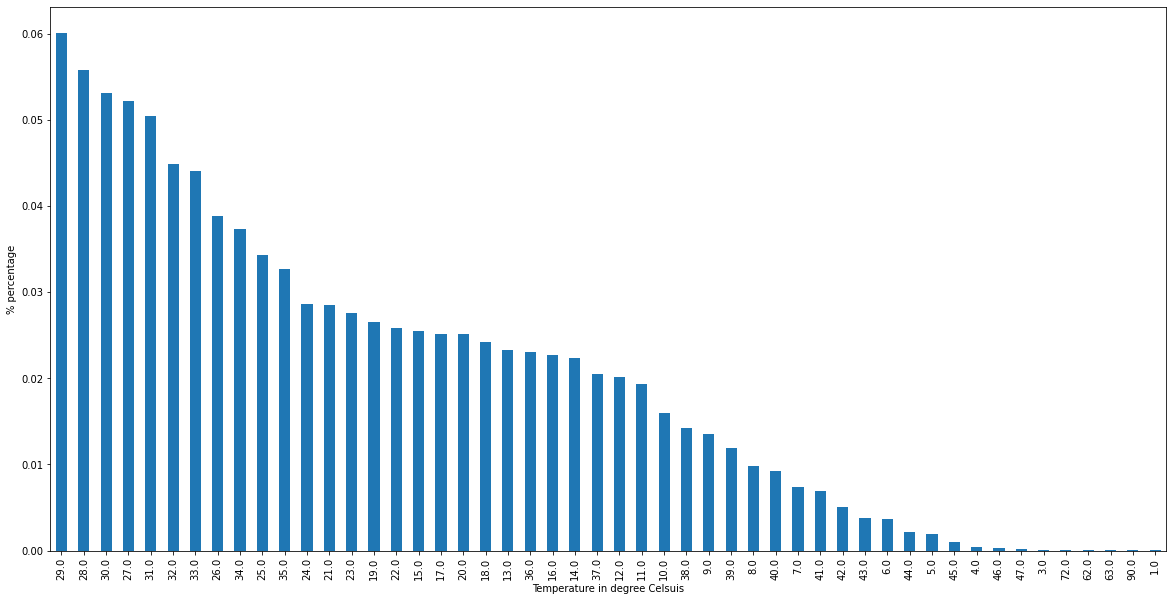

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
data.iloc[:,11].value_counts(normalize=True,sort=True).plot(kind='bar')
plt.xlabel('Temperature in degree Celsuis')
plt.ylabel('% percentage')
plt.show()


In [11]:
# So we can see that most of the time the temperature lies in the range (20-35 )

#'lets check if we have any missing values in our target column'

data.iloc[:,11].isna().sum()

# As we can see that there are 673 rows which have missing values for temperature feature 


673

In [12]:
import datetime as dt
# let's impute the misisng values by the mean of the month

data['month']=pd.to_datetime(data.datetime_utc).dt.to_period('M')

data.month.value_counts()

2004-05    1401
2003-10    1392
2003-08    1372
2003-12    1358
2004-03    1353
           ... 
2013-08     183
2012-10     183
1999-04     178
2000-04       1
2000-05       1
Freq: M, Name: month, Length: 245, dtype: int64

In [13]:
aa=data.iloc[:,11].name

In [14]:
ac=data.groupby(by='month')[aa].mean()

In [15]:
ab=data[' _tempm'].isna()

In [16]:
data.loc[ab,[' _tempm']]=data.loc[ab,'month'].apply(lambda x:ac[x])

In [17]:
data[' _tempm'].isna().sum()

0

In [19]:
new_df=pd.DataFrame(list(data[' _tempm']),index=data.datetime_utc,columns=['temperature'])

In [20]:
new_df

,temperature
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0
...,...
2017-04-24 06:00:00,34.0
2017-04-24 09:00:00,38.0
2017-04-24 12:00:00,36.0


In [21]:
new_df=new_df.resample('D').mean()

In [22]:
new_df

,temperature
datetime_utc,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000
...,...
2017-04-20,34.500000
2017-04-21,34.250000
2017-04-22,32.900000


In [23]:
month_df=new_df.resample('M').mean()

In [24]:
month_df

,temperature
datetime_utc,
1996-11-30,19.565236
1996-12-31,13.804185
1997-01-31,12.849546
1997-02-28,15.946360
1997-03-31,21.279099
...,...
2016-12-31,17.676801
2017-01-31,15.711022
2017-02-28,18.349981


In [25]:
year_df=new_df.resample('Y').mean()

In [26]:
year_df

,temperature
datetime_utc,
1996-12-31,16.637489
1997-12-31,23.726028
1998-12-31,24.502157
1999-12-31,26.063898
2000-12-31,23.932358
2001-12-31,25.570254
2002-12-31,26.508447
2003-12-31,25.558486
2004-12-31,25.660784


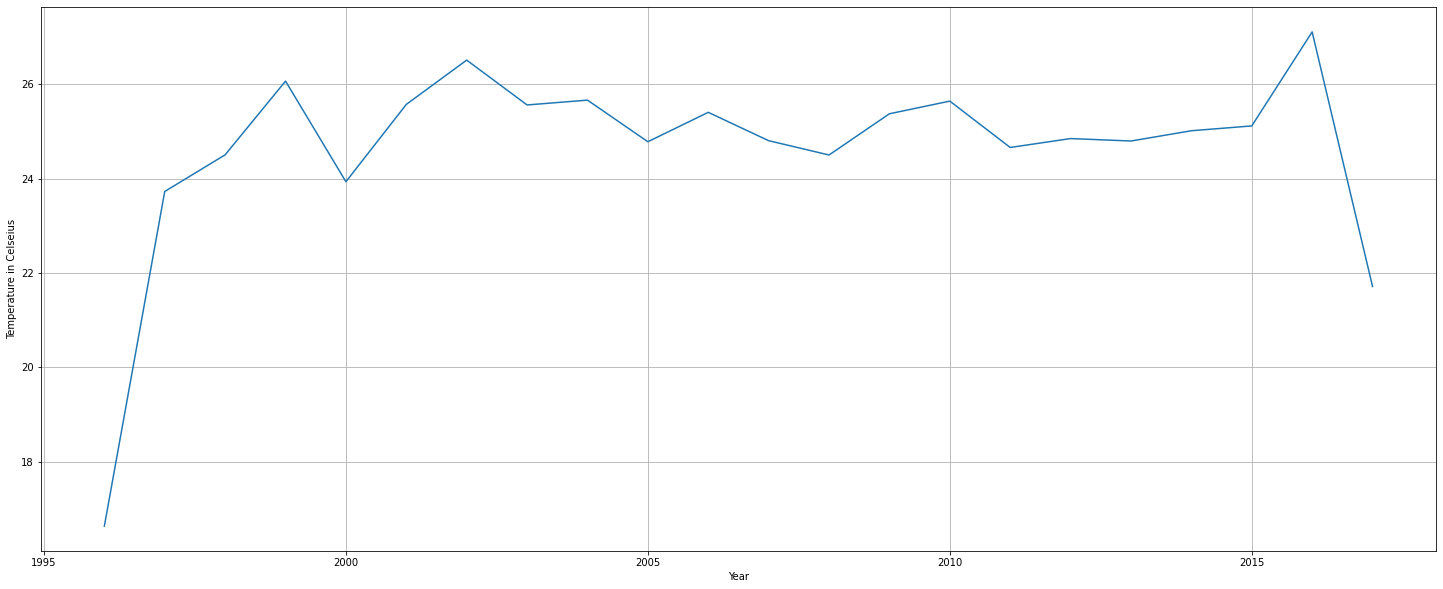

In [27]:
plt.figure(figsize=(25,10))
plt.plot(range(1996,2018,1),year_df.temperature)
plt.xlabel('Year')
plt.ylabel('Temperature in Celseius')
plt.grid(True)
plt.show()

In [29]:
# as we can see the average temperature has been increasing over the years

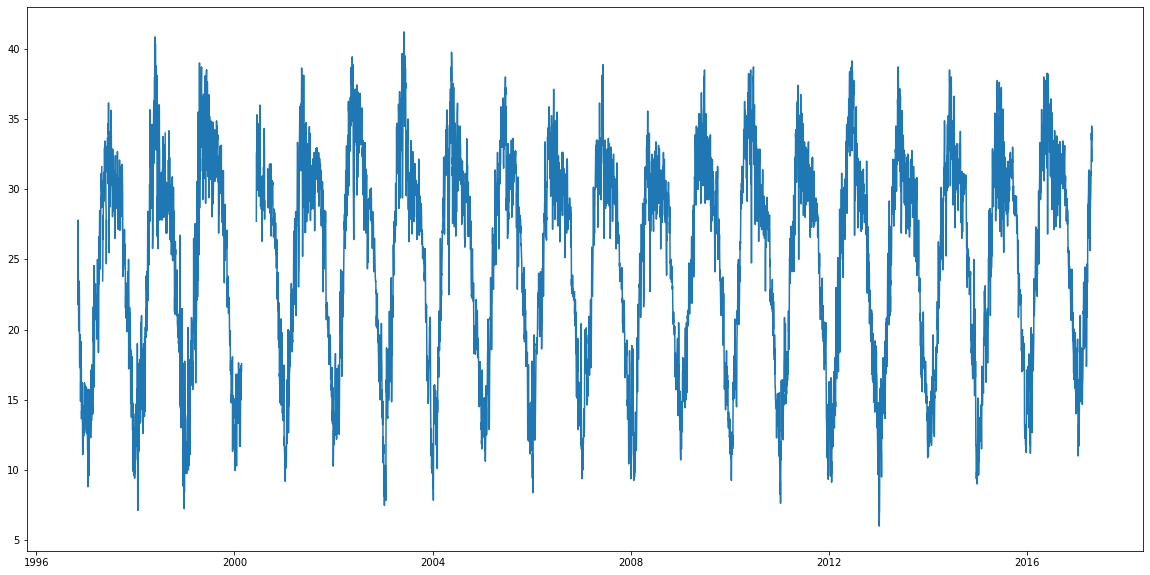

In [30]:
plt.figure(figsize=(20,10))
plt.plot(new_df)
plt.show()

In [31]:
from keras.layers import Bidirectional,LSTM,Dense,Flatten,Conv1D,MaxPooling1D,Dropout,RepeatVector
from keras.models import Sequential
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

early_stop=EarlyStopping(monitor='loss',patience=5)

In [32]:
model=Sequential([Conv1D(100,kernel_size=3,input_shape=(30,1),activation='relu'),
                  Conv1D(100,kernel_size=3),
                  Conv1D(100,kernel_size=3),
                  MaxPooling1D(2),
                 Flatten(),
                  RepeatVector(30),
                 LSTM(128,activation='relu',return_sequences=True),
                 LSTM(128,activation='relu',return_sequences=True),
                  Bidirectional(LSTM(64,activation='relu')),
                 Dense(128,activation='relu'),
                 Dense(1)])

model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [33]:
new_df1=pd.DataFrame(list(data[' _tempm']), index=data['datetime_utc'], columns=['temp'])

In [34]:
new_df1

,temp
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0
...,...
2017-04-24 06:00:00,34.0
2017-04-24 09:00:00,38.0
2017-04-24 12:00:00,36.0


In [35]:
new_df1=new_df1.resample('D').mean()

In [36]:
new_df1.temp.isna().sum()

141

In [37]:
new_df1.fillna(data[' _tempm'].mean(),inplace=True)

In [38]:
new_df1.temp.isna().sum()

0

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(-1,1))

In [40]:
scaled_data=scaler.fit_transform(new_df1)

In [41]:
scaled_data[:5]

array([[-0.07224714],
       [-0.0391131 ],
       [-0.10301445],
       [-0.05015778],
       [ 0.23826607]])

In [44]:
steps=30
inp1=[]
out1=[]

for i in range(len(scaled_data)-steps):
    inp1.append(scaled_data[i:i+steps])
    out1.append(scaled_data[i+steps])
    

In [45]:
inp1=np.asanyarray(inp1)
out1=np.asanyarray(out1)
x_train1=inp1[:7300,:,:]
x_test1=inp1[7300:,:,:]
y_train1=out1[:7300]
y_test1=out1[7300:]

In [46]:
model.fit(x_train1,y_train1,epochs=3)

Epoch 1/3
229/229 [==============================] - 56s 225ms/step - loss: 0.0220 - accuracy: 1.3699e-04
Epoch 2/3
229/229 [==============================] - 52s 228ms/step - loss: 0.0114 - accuracy: 1.3699e-04
Epoch 3/3
229/229 [==============================] - 53s 229ms/step - loss: 0.0106 - accuracy: 1.3699e-04


In [47]:
predicted=model.predict(x_test1)

In [48]:
predicted1=scaler.inverse_transform(predicted)

In [49]:
y_test2=scaler.inverse_transform(y_test1)

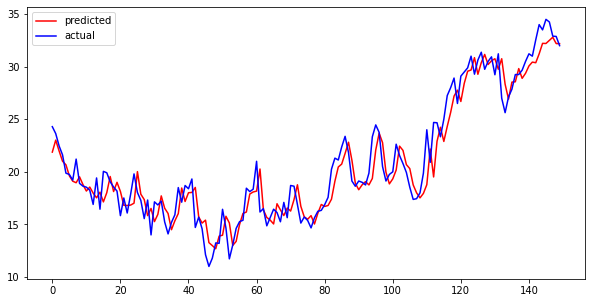

In [50]:
plt.figure(figsize=(10,5))
plt.plot(predicted1,'r',label='predicted')
plt.plot(y_test2,'b',label='actual')
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predicted1, y_test2)

2.8031967295748412